In [1]:
import pandas as pd 
import numpy as np
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random    
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
import collections
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\ritik\Desktop\Hackathon PS\Predicting Sentiments\train.csv')

In [3]:
df.shape

(7920, 3)

In [4]:
df.head(20)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [7]:
df['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [8]:
tweets_with_hashtags=df.loc[df['tweet'].str.contains('#')]
print("No of tweets with hashtags",len(tweets_with_hashtags))

No of tweets with hashtags 7202


In [9]:
tweets_with_hashtags

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
6,0,Happy for us .. #instapic #instadaily #us #son...
...,...,...
7914,0,Gain Followers RT This MUST FOLLOW ME I FOLLOW...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,0,We would like to wish you an amazing day! Make...
7918,0,Finally got my #smart #pocket #wifi stay conne...


In [10]:
tweets_with_url=df.loc[df['tweet'].str.contains('http')]
print("No of tweets with url",len(tweets_with_url))

No of tweets with url 4359


In [11]:
tweets_with_url

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
6,0,Happy for us .. #instapic #instadaily #us #son...
...,...,...
7910,0,Perfect match #instagood #applewatch #red #ins...
7912,0,Tune in. Turn on. Drop out. & #GTD in one app!...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...
7918,0,Finally got my #smart #pocket #wifi stay conne...


In [12]:
#string containing all the tweets
tweets=" ".join(tweet for tweet in df['tweet'])

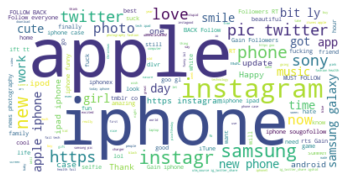

In [13]:
tweet_wordcloud=WordCloud(background_color='White',
                         max_words=150).generate(tweets)
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
#removing all the mentions and users
tweets=re.sub(r'@\w+','@USER',tweets)
tweets[0:200]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony '

In [15]:
#removing all the urls and replacing it with _URL_
tweets=re.sub(r'http\S+','_URL_',tweets)
tweets[0:200]

'#fingerprint #Pregnancy Test _URL_ #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sony'

In [16]:
#removing all the #
tweets=re.sub(r'#','',tweets)
tweets[0:200]

'fingerprint Pregnancy Test _URL_ android apps beautiful cute health igers iphoneonly iphonesia iphone Finally a transparant silicon case ^^ Thanks to my uncle :) yay Sony Xperia S sonyexperias… _URL_ '

In [17]:
#converting into lower
tweets=tweets.lower()

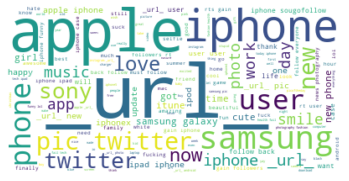

In [18]:
tweet_wordcloud=WordCloud(background_color='White',
                         max_words=150).generate(tweets)
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#instantiate tokenizer class
tokenizer=TweetTokenizer(preserve_case=False, strip_handles=True,
                        reduce_len=True)

#tokenize tweets
tweet_tokens=tokenizer.tokenize(tweets)

In [20]:
stopwords_english = stopwords.words('english') 

tweets_clean=[]

for word in tweet_tokens:
    if(word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)
        
print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['fingerprint', 'pregnancy', 'test', '_url_', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', ':)', 'yay', 'sony', 'xperia', 'sonyexperias', '…', '_url_', 'love', 'would', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', '...', '_url_', "i'm", 'wired', 'know', "i'm", 'george', 'made', 'way', ';)', 'iphone', 'cute', 'daventry', 'home', '_url_', 'amazing', 'service', 'apple', 'even', 'talk', 'question', 'unless', 'pay', '19.95', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'us', '..', 'instapic', 'instadaily', 'us', 'sony', 'xperia', 'xperiaz', '_url_', 'new', 'type', 'c', 'charger', 'cable', 'uk', '_url_', '…', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', '201

In [21]:
stemmer=PorterStemmer()

tweets_stem=[]

for word in tweets_clean:
    stem_word=stemmer.stem(word)
    tweets_stem.append(word)
    
print('stemmed words:')
print(tweets_stem)        

stemmed words:
['fingerprint', 'pregnancy', 'test', '_url_', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', ':)', 'yay', 'sony', 'xperia', 'sonyexperias', '…', '_url_', 'love', 'would', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', '...', '_url_', "i'm", 'wired', 'know', "i'm", 'george', 'made', 'way', ';)', 'iphone', 'cute', 'daventry', 'home', '_url_', 'amazing', 'service', 'apple', 'even', 'talk', 'question', 'unless', 'pay', '19.95', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'us', '..', 'instapic', 'instadaily', 'us', 'sony', 'xperia', 'xperiaz', '_url_', 'new', 'type', 'c', 'charger', 'cable', 'uk', '_url_', '…', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', '2018', 'newyear', 'start

In [22]:
#get the frequency of each word 
tweet_freqs=collections.Counter(tweets_stem)
print(tweet_freqs)

Counter({'_url_': 4453, 'iphone': 4207, 'apple': 2831, '…': 1955, 'samsung': 1405, 'new': 1142, '...': 978, 'phone': 960, 'sony': 844, 'follow': 743, 'ipad': 525, 'like': 475, 'love': 435, 'life': 416, 'android': 412, 'ios': 396, 'rt': 387, 'day': 374, 'instagram': 359, 'cute': 329, 'photo': 321, 'gain': 310, 'today': 309, 'get': 297, 'galaxy': 295, 'photography': 295, 'back': 290, 'fun': 282, 'got': 280, 'case': 274, 'music': 264, 'news': 264, '..': 262, '2': 258, "i'm": 255, 'instagood': 250, '3': 248, 'app': 243, 'happy': 241, 'beautiful': 235, '4': 233, 'funny': 224, 'time': 221, 'lol': 219, 'fashion': 219, '5': 217, '7': 214, 'smile': 213, 'one': 212, 'itunes': 208, 'birthday': 207, 'work': 206, 'tech': 205, 'iphonex': 200, 'ipod': 200, ':)': 199, 'photooftheday': 195, 'finally': 191, 'good': 182, 'everyone': 182, '6': 180, 'amazing': 178, 'make': 177, 'apps': 175, 'girl': 175, 'must': 168, 'sougofollow': 165, 'update': 164, 'mac': 163, 'note': 162, 'selfie': 161, 'followers': 161

In [23]:
freqs_df=pd.DataFrame.from_dict(tweet_freqs,orient='index').reset_index()
freqs_df.columns=['word','freq']
freqs_df.sort_values(by='freq',ascending=False)

,word,freq
3,_url_,4453
12,iphone,4207
47,apple,2831
24,…,1955
234,samsung,1405
...,...,...
8674,flour,1
8675,megaland,1
8678,hawaii,1
8680,cane,1


Text(0.5, 1.0, 'Top 25 Most Frequent Words')

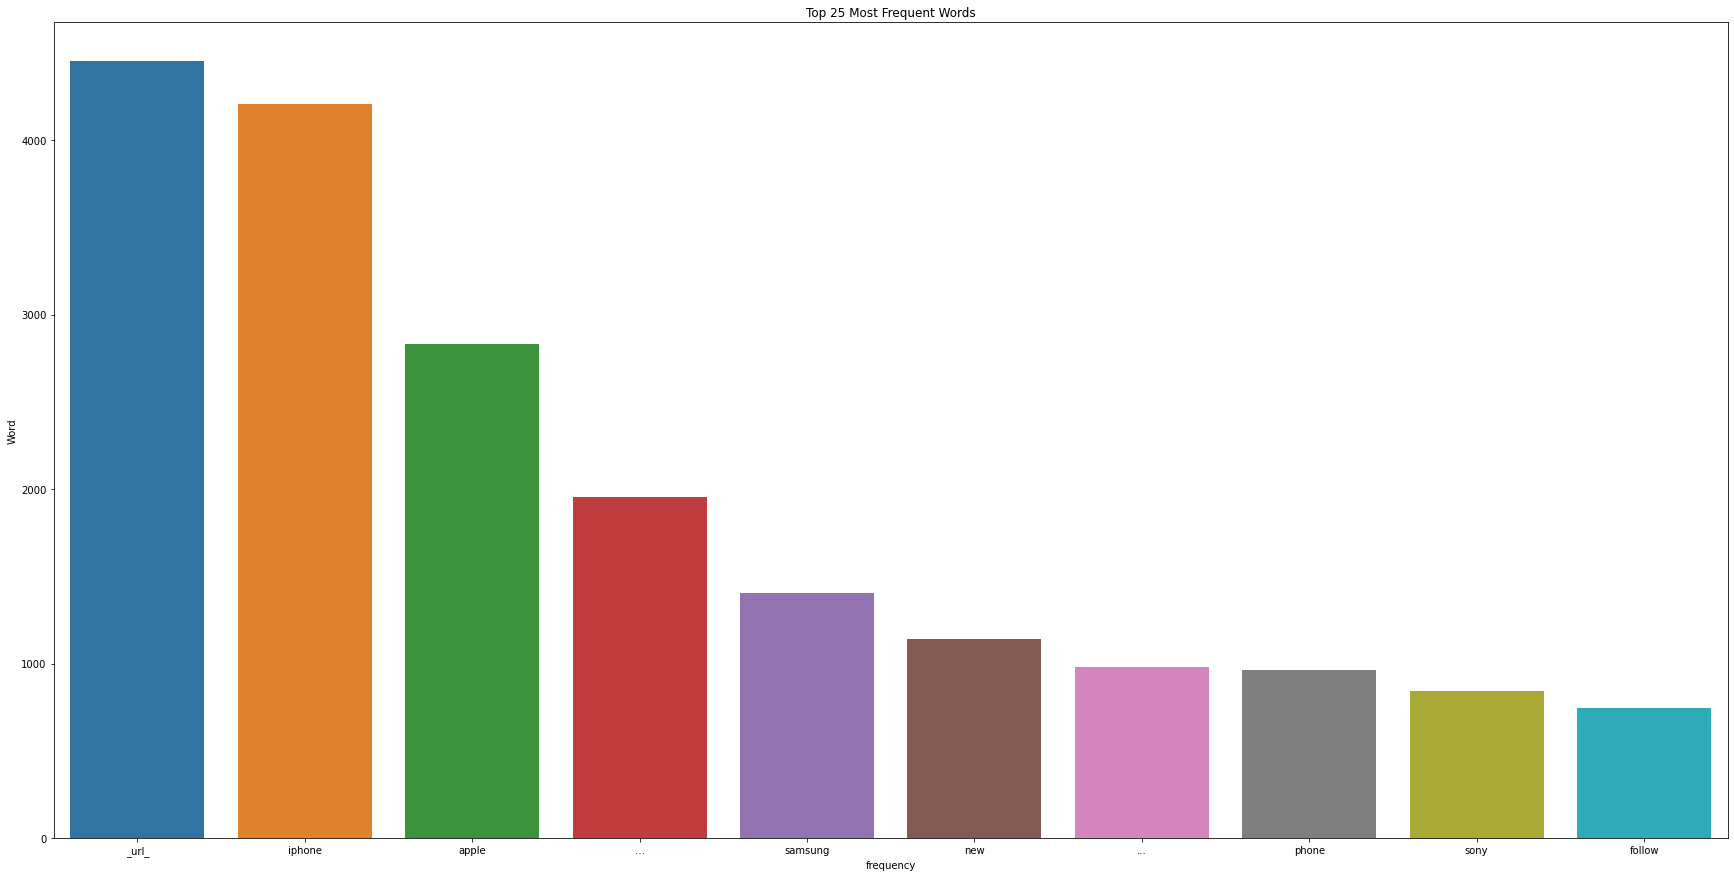

In [24]:
plt.figure(figsize=(30,15))

sns.barplot(data=freqs_df.sort_values(by='freq',ascending=False).head(10),
           x='word',
           y='freq')
plt.ylabel('Word')
plt.xlabel('frequency')
plt.title("Top 25 Most Frequent Words")


In [25]:
freqs_df.head()

,word,freq
0,fingerprint,5
1,pregnancy,1
2,test,10
3,_url_,4453
4,android,412


In [26]:
freqs_df.shape

(17377, 2)